In [1]:
import numpy as np
import scipy.stats as stats

def wilcoxon_test_pvalues(data1, data2):
  """
  Performs Wilcoxon signed-rank test and returns the p-value.

  Args:
      data1 (list): List of data points for group 1.
      data2 (list): List of data points for group 2.

  Returns:
      float: p-value from the Wilcoxon signed-rank test.
  """
  _, p_value = stats.wilcoxon(data1, data2)
  return p_value

def create_kinf_matrix(data_list):
  """
  Creates a kinship (kinf) of p-value matrix from a list of data lists.

  Args:
      data_list (list): List of lists, where each inner list represents data points for a group.

  Returns:
      numpy.ndarray: Kinf of p-value matrix.
  """
  n = len(data_list)
  p_value_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(i, n):  # Fill upper triangular matrix only (excluding diagonal)
      p_value_matrix[i, j] = wilcoxon_test_pvalues(a, b)
  # Fill lower triangular matrix by mirroring upper triangular values
  p_value_matrix += p_value_matrix.T - np.diag(p_value_matrix.diagonal())
  return p_value_matrix


In [2]:
#usage: py evaluation_script.py file_path_X_test file_path_y_test
#example: py evaluation_script.py "../NEUROEVOLUTION/datamart/data_project_nel.csv" "datamart/y_lactose.csv"

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.path.dirname('../NEUROEVOLUTION'), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

parent_dir = os.path.abspath(os.path.join(os.path.dirname('../NEUROEVOLUTION/genetic_programming'), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)


parent_dir = os.path.abspath(os.path.join(os.path.dirname('../NEUROEVOLUTION/gpolnel'), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import friedmanchisquare, levene, wilcoxon
import pickle
import re
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
import sys
import csv
import numpy as np
import torch.nn as nn
from NEUROEVOLUTION.utils import root_mean_squared_error, drop_features, kfold, load_best_params, complete_params, seed, device, mean_cross_validation, extract_number
from NEUROEVOLUTION.gpolnel.utils.ffunctions import Ffunctions
from NEUROEVOLUTION.genetic_programming.gp_utils import gp_cross_validation#NEUROEVOLUTION.
from NEUROEVOLUTION.geometric_semantic_genetic_programming.gsgp_utils import gsgp_cross_validation
from NEUROEVOLUTION.neuroevolution_gpol_based.ne_utils import ne_cross_validation
from NEUROEVOLUTION.neuroevolution_augmentingtopologies.neat_utils import neat_cross_validation
from NEUROEVOLUTION.neural_network_backpropagation.nn_utils import nn_cross_validation

In [3]:
target = 'lactose'
file_path_X = '../datamart/data_project_nel.csv'
file_path_y = '../datamart/y_' + f'{target}'+ '.csv'
X = pd.read_csv(file_path_X)
X = drop_features(X)
y = pd.read_csv(file_path_y)['lactose_percent']


batch_size = X.shape[0]
shuffle = True
ffunction = Ffunctions('rmse')
loss_fn = nn.MSELoss()

In [4]:
gp_best_params = load_best_params('../genetic_programming/best_params/lactose-best_params_final.pkl')#('../NEUROEVOLUTION/genetic_programming/best_params/' + f'{target}' + '-best_params-1.pkl')
gp_best_params = complete_params(gp_best_params)

In [5]:
gp_score = gp_cross_validation(X, y, batch_size, shuffle, kfold, gp_best_params['initializer'], gp_best_params['ps'], gp_best_params['n_iter'],  
                               gp_best_params['sspace'],  gp_best_params['selection_method'], gp_best_params['mutation_prob'], 
                               gp_best_params['mutation_method'], gp_best_params['xo_prob'],gp_best_params['xo_method'], 
                               gp_best_params['has_elitism'], gp_best_params['allow_reproduction'], log_path_cv = 'logs/'+ f'{target}'+ '/gp_cv.csv',
                               log_path_train = 'logs/'+ f'{target}'+ '/gp_train.csv', ffunction=ffunction, seed=seed,  device=device, id=1)

cv_score: 0.06448133


In [6]:
gsgp_best_params = load_best_params('../geometric_semantic_genetic_programming/best_params/lactose-best_params_final.pkl')#('../NEUROEVOLUTION/genetic_programming/best_params/' + f'{target}' + '-best_params-1.pkl')
gsgp_best_params = complete_params(gsgp_best_params)

In [7]:
gsgp_score = gsgp_cross_validation(X, y, batch_size, shuffle, kfold, gsgp_best_params['initializer'], gsgp_best_params['ps'], gsgp_best_params['n_iter'],  
                               gsgp_best_params['sspace'],  gsgp_best_params['selection_method'], gsgp_best_params['mutation_prob'], 
                               gsgp_best_params['mutation_method'], gsgp_best_params['xo_prob'],gsgp_best_params['xo_method'], 
                               gsgp_best_params['has_elitism'], gsgp_best_params['allow_reproduction'], log_path_cv ='logs/'+ f'{target}'+ '/gsgp_cv.csv',
                               log_path_train ='logs/'+ f'{target}'+ '/gsgp_train.csv', ffunction=ffunction, seed=seed,  device=device, id=1)

cv_score: 0.0686336


In [4]:
ne_best_params = load_best_params('../neuroevolution_gpol_based/best_params/lactose-best_params_final.pkl')#('../NEUROEVOLUTION/genetic_programming/best_params/' + f'{target}' + '-best_params-1.pkl')
ne_best_params = complete_params(ne_best_params)

In [5]:
ne_score = ne_cross_validation(X, y, batch_size, shuffle, kfold, ne_best_params['initializer'], ne_best_params['ps'], ne_best_params['n_iter'],  
                               ne_best_params['sspace'],  ne_best_params['selection_method'], ne_best_params['mutation_prob'], 
                               ne_best_params['mutation_method'], ne_best_params['xo_prob'],ne_best_params['xo_method'], 
                               ne_best_params['has_elitism'], ne_best_params['allow_reproduction'], log_path_cv ='logs/'+ f'{target}'+ '/ne_cv.csv',
                               log_path_train = 'logs/'+f'{target}'+ '/nee_train.csv', ffunction=ffunction, seed=seed,  device=device, id=1) #

cv_score: 0.5273124


In [12]:
neat_best_params = load_best_params('../neuroevolution_augmentingtopologies/best_params/lactose-best_params_final.pkl')#('../neatUROEVOLUTION/geneattic_programming/best_params/' + f'{target}' + '-best_params-1.pkl')

In [13]:
neat_score = neat_cross_validation( X, y, config_path = '../neuroevolution_augmentingtopologies/' + neat_best_params['config_file'] , kf=kfold, n_iter=neat_best_params['n_iter'],  train_log_path= 'logs/'+f'{target}'+ '/neat_train.csv', cv_log_path= 'logs/'+f'{target}'+ '/neat_cv.csv', id=1)

0.06536940897323176


In [ ]:
nn_best_params = load_best_params('../neural_network_backpropagation/best_params/lactose-best_params_final.pkl')#('../nnUROEVOLUTION/genntic_programming/best_params/' + f'{target}' + '-best_params-1.pkl')

In [ ]:
nn_best_params['model']

Sequential(
  (0): Linear(in_features=12, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
model = nn.Sequential(nn.Linear( 12, 8))
model.add_module('out', nn.Linear(8, 1))
nn_score = nn_cross_validation(X, y, model=model, cv_log_path ='logs/'+ f'{target}'+ '/nn_cv.csv', train_log_path='logs/'+ f'{target}'+ '/nn_train.csv', loss_fn=loss_fn, optimizer_name = nn_best_params['optimizer_name'], lr = nn_best_params['lr'], weight_decay=nn_best_params['weight_decay'], n_epochs = nn_best_params['n_epochs'], batch_size= nn_best_params['batch_size'],  kf=kfold, id=1 )

0.058353383

In [ ]:
mean_score = mean_cross_validation(X,y,log_path_cv ='logs/'+ f'{target}'+ '/mean_cv.csv', id=1)

cv_score: 0.06466750592096202


In [9]:
gp_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/gp_cv.csv', sep=';')['val_score'].apply(extract_number)
gsgp_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/gsgp_cv.csv', sep=';')['val_score'].apply(extract_number)
ne_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/ne_cv.csv', sep=';')['val_score'].apply(extract_number)

neat_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/neat_cv.csv', sep=';')['val_score']
nn_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/nn_cv.csv', sep=';')['val_score'].apply(extract_number)
mean_log_cv = pd.read_csv('logs/'+ f'{target}'+ '/mean_cv.csv', sep=';')['val_score']

In [10]:
data = {
    'gp': gp_log_cv,
    'gsgp': gsgp_log_cv,
    'ne_gpol': ne_log_cv,
    'neat': neat_log_cv,
    'nn_backprop': nn_log_cv,
    'mean': mean_log_cv
}

In [11]:
def wilcoxon_test(series1, series2):
    return wilcoxon(series1, series2, alternative='greater')[1]

# Create a DataFrame to store the p-values
p_values = pd.DataFrame(np.zeros((len(data), len(data))), index=data.keys(), columns=data.keys())

# Perform pairwise Wilcoxon tests
for key1 in data.keys():
    for key2 in data.keys():
        if key1 != key2:
            p_values.loc[key1, key2] = wilcoxon_test(data[key1], data[key2])


ValueError: The samples x and y must have the same length.

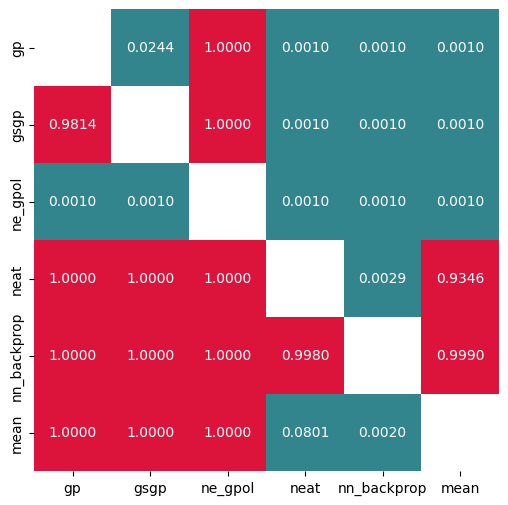

In [ ]:
from matplotlib.colors import ListedColormap
# def cor_heatmap(cor):
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds, fmt='.4f', robust=True)
#     plt.show()

# # Plot the heatmap
# cor_heatmap(p_values)
colors = sns.color_palette('crest', 1) + ['crimson']
#cmap = ListedColormap(colors)

# Create a mask for the heatmap (only diagonal)
mask = np.eye(p_values.shape[0], dtype=bool)

# Plot the heatmap of p-values
def p_heatmap(p):
    plt.figure(figsize=(6,6))
    sns.heatmap(data=p, annot=True, cmap=sns.color_palette(colors, as_cmap=True), fmt='.4f', robust=True, cbar=False, mask=mask, vmin=0, vmax=1)
    plt.show()

# Plot the heatmap
p_heatmap(p_values)

In [ ]:
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# Convert the DataFrame to a long format
df_long = df.melt(var_name='Method', value_name='Score')

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='Score', data=df_long)
plt.title('Comparison of Validation Scores')
plt.ylabel('Validation Score')
plt.xlabel('Method')
plt.xticks(rotation=45)
plt.ylim(0, 0.1)
plt.yticks(np.arange(0, 0.22, 0.05))
plt.show()

NameError: name 'data' is not defined

In [ ]:
friedmanchisquare(gp_log_cv, gsgp_log_cv, ne_log_cv, neat_log_cv, nn_log_cv, mean_log_cv)
levene(gp_log_cv, gsgp_log_cv, ne_log_cv, neat_log_cv, nn_log_cv, mean_log_cv)


LeveneResult(statistic=2.0423325424713763, pvalue=0.08719514791265769)

In [8]:
gp_log_train = pd.read_csv('logs/'+ f'{target}'+ '/gp_train.csv', sep=',',header=None)
gp_log_train[['train_score', 'val_score']] = gp_log_train[[7,8]]



0       0.5474
1       0.5309
2       0.5309
3       0.3554
4       0.3554
         ...  
2543    0.6898
2544    0.6898
2545    0.6898
2546    0.6898
2547    0.6898
Name: train_score, Length: 2548, dtype: float64

In [ ]:
gp_best_params['n_iter']

In [ ]:
gp_best_params['n_iter']

10

In [ ]:
gp_best_params['ps']

50